<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [4]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [7]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,153.0,42.052288,30.156127,1.0,20.00,34.0,59.00,168.0
Solar.R,146.0,185.931507,90.058422,7.0,115.75,205.0,258.75,334.0
Wind,153.0,9.957516,3.523001,1.7,7.40,9.7,11.50,20.7
Temp,153.0,77.882353,9.465270,56.0,72.00,79.0,85.00,97.0
Month,153.0,6.993464,1.416522,5.0,6.00,7.0,8.00,9.0
Day,153.0,15.803922,8.864520,1.0,8.00,16.0,23.00,31.0


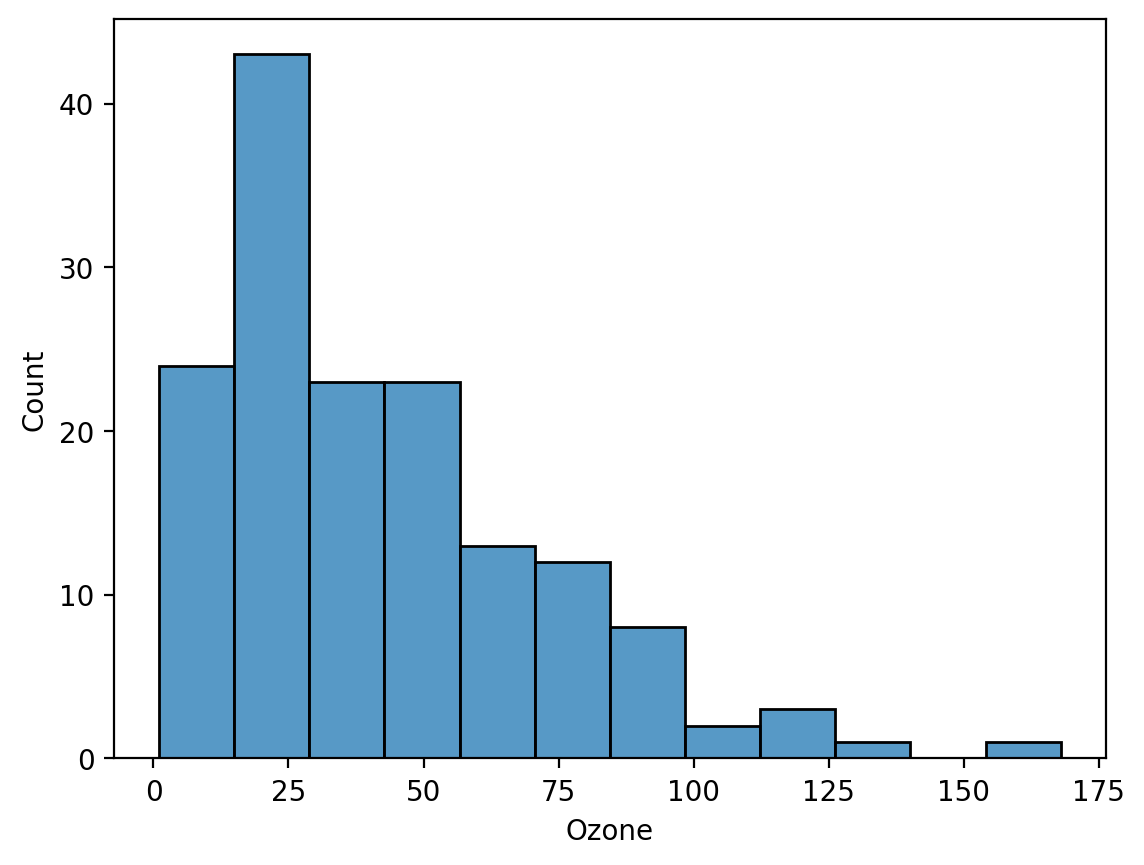

In [10]:
# Ozone 데이터 분포
sns.histplot(x='Ozone', data=data)
plt.show()

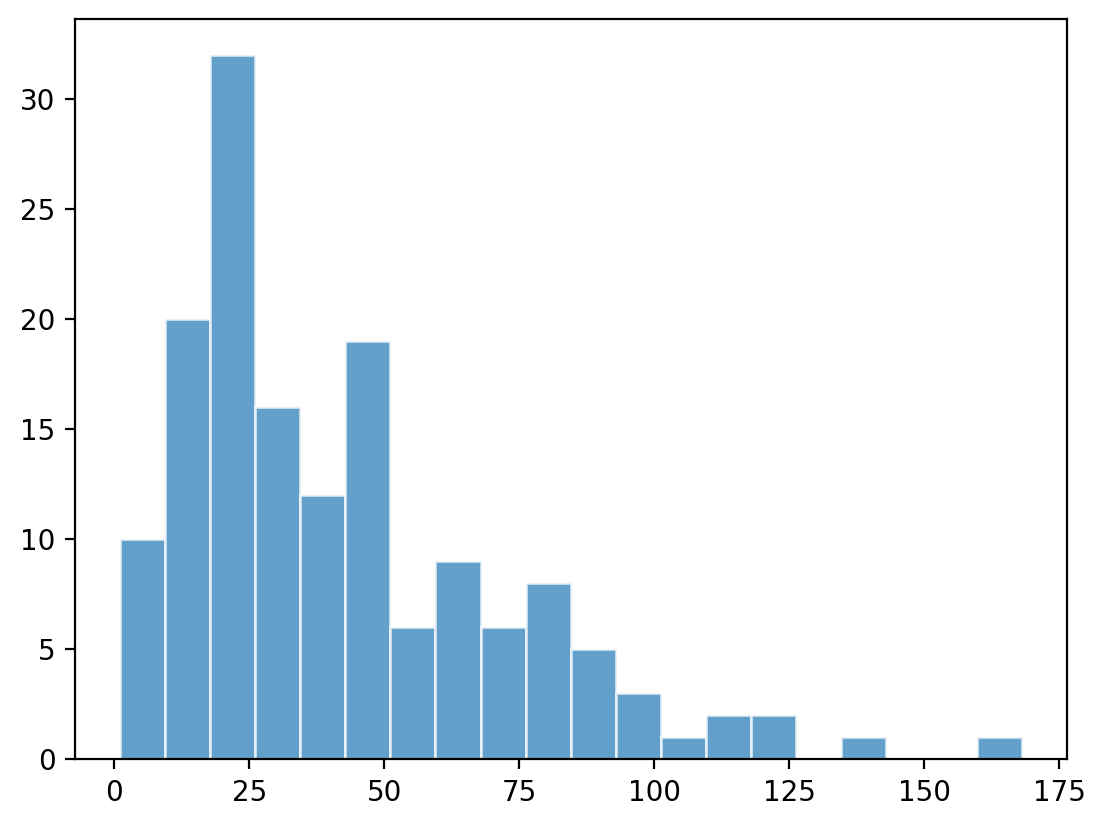

In [12]:
plt.hist(data['Ozone'], bins=20, alpha = 0.7, ec='w')
plt.show()

In [8]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


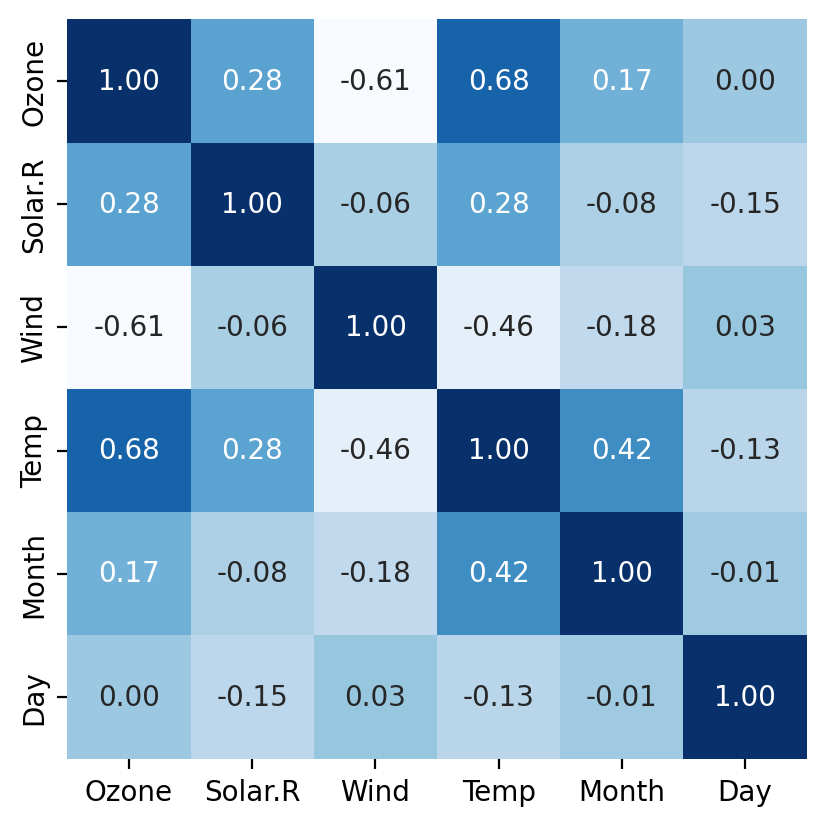

In [18]:
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.2f', cbar=False, square=True)
plt.show()

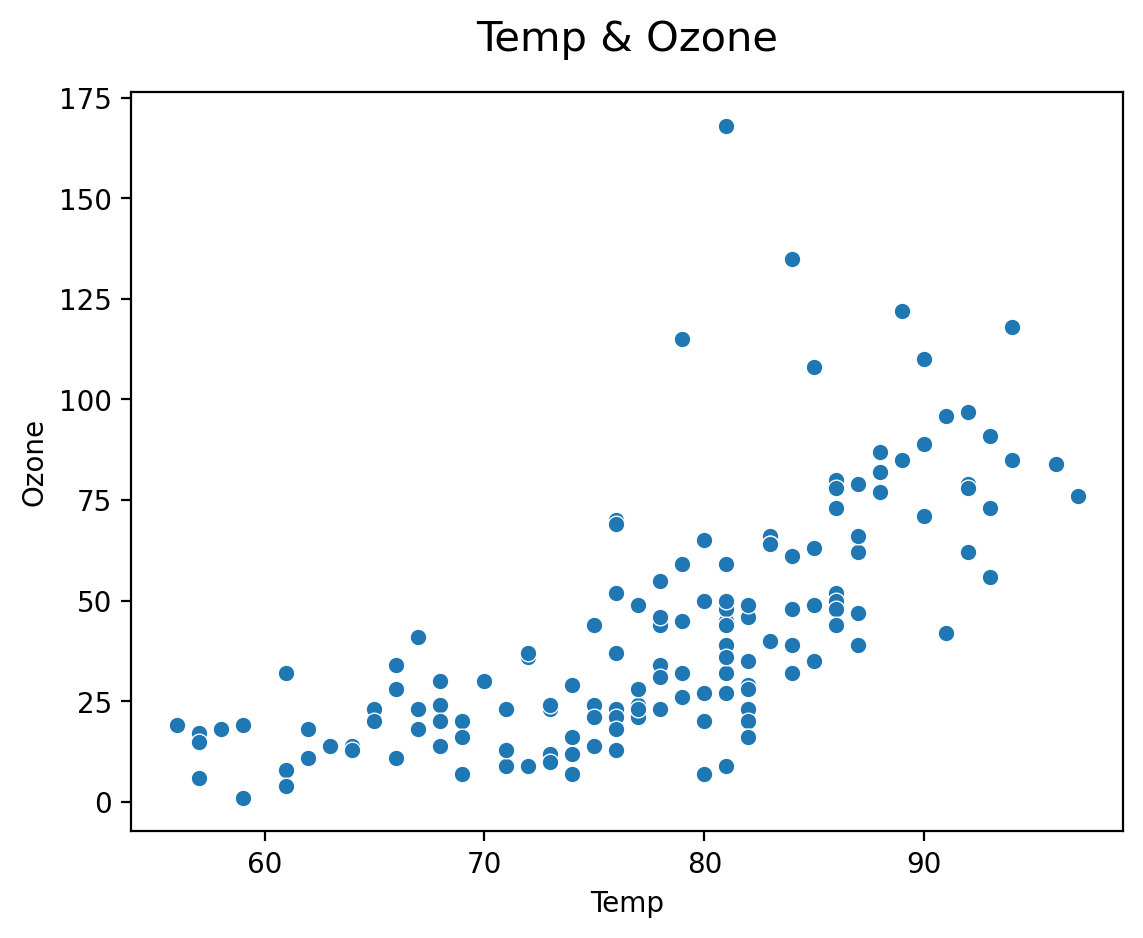

In [23]:
# Temp --> Ozone
sns.scatterplot(x='Temp', y='Ozone', data=data)
plt.title('Temp & Ozone', size=15, pad = 15)
plt.show()

In [24]:
# help(sns.heatmap)

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [25]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [26]:
help(data.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value: 'Hashable | Mapping | Series | DataFrame' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit: 'int | None' = None, downcast: 'dict | None' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill /

In [27]:
# 전날 값으로 결측치 채우기
data.fillna(method='ffill', inplace=True)

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [28]:
data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [29]:
# 변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


**3) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [30]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]
# y = data[target]

In [31]:
# x 확인
x.head()

,Solar.R,Wind,Temp
0,190.0,7.4,67
1,118.0,8.0,72
2,149.0,12.6,74
3,313.0,11.5,62
4,313.0,14.3,56


In [32]:
y.head()

0    41
1    36
2    12
3    18
4    19
Name: Ozone, dtype: int64

In [34]:
y.dtype

dtype('int64')

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

<img src = "https://github.com/Jangrae/img/blob/master/split.png?raw=true" width=500 align="left"/>

In [40]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((107, 3), (46, 3), (107,), (46,))

In [42]:
x_train.head()

,Solar.R,Wind,Temp
132,259.0,9.7,73
73,175.0,14.9,81
18,322.0,11.5,68
48,37.0,9.2,65
4,313.0,14.3,56


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [44]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [45]:
# 2단계: 선언하기
model = LinearRegression()

In [46]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [47]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [49]:
# 예측 값 확인
y_pred[:10]

array([13.84003067,  5.82919112, 81.93563027, 58.41267418, 50.86150737,
       31.52971121, 66.8083547 , -8.56411529, 50.2136544 , 39.13346172])

In [50]:
# 실제 값 확인
y_test.values[:10]

array([24, 18, 97, 47, 34, 22, 66, 18, 69, 27], dtype=int64)

In [53]:
# 5단계: 평가하기
# 값의 차이의 절대값의 평균
print('MAE :',mean_absolute_error(y_test, y_pred))

MAE : 13.976843190385708


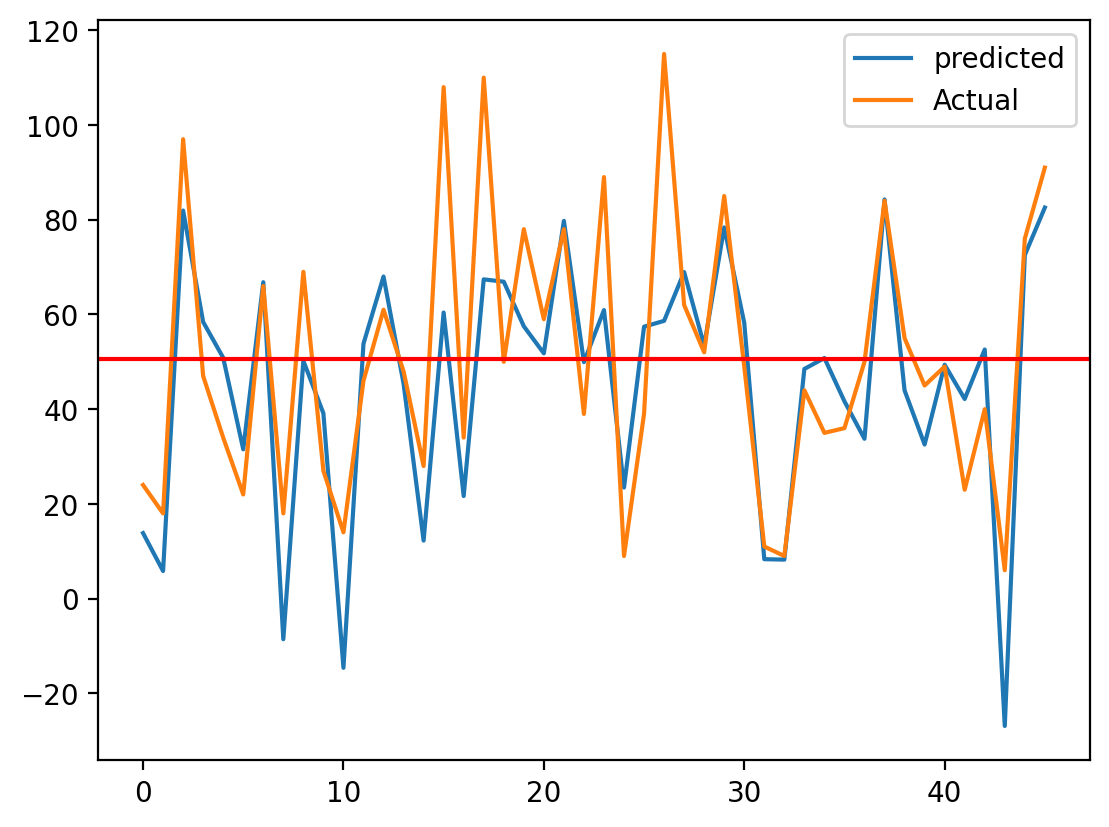

In [57]:
# 평균 시각화
mean_ozone = y_test.mean()

# 시각화
plt.plot(y_pred, label = 'predicted') # 예측값
plt.plot(y_test.values, label = 'Actual') # 실제값
plt.axhline(mean_ozone, c='r')
plt.legend()
plt.show()

In [ ]:
# 평균보다는 좋은 모델
# 평균과 실제값의 차이보다 모델예측값과 실제값의 차이가 더 작다.

In [58]:
dir(y_test)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__redu